In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import random

In [3]:
data_dir = "./data/"
img = cv2.imread(data_dir + "house.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
n, m = 3, 4

In [68]:
def resize(img, n, m):
    h, w = img.shape[0], img.shape[1] # img 높이, 넓이 알기
    while w % n != 0: # 이미지 크기 맞추기
        w -= 1

    while h % m != 0: # 이미지 크기 맞추기
        h -= 1

    img = cv2.resize(img, (w, h)) # 크기에 맞춰 resize 하기
    
    return img

In [69]:
img_resize = resize(img, n, m)
img_resize.shape

(332, 500, 3)

In [70]:
def cut_image(img, n, m):
    img_list = []
    for i in range(n):
        for j in range(m):
            img_list.append(img_resize[(img_resize.shape[0]//n)*i:(img_resize.shape[0]//n)*(i+1), (img_resize.shape[1]//m)*j:(img_resize.shape[1]//m)*(j+1)])
    
    return img_list

In [71]:
img_list = cut_image(img_resize, n, m)
img_list[0].shape


(166, 250, 3)

In [86]:
def mirroring(img):
    img = cv2.flip(img, 1)
    return img

In [92]:
def flip(img):
    img = cv2.flip(img, 0)
    return img

In [108]:
def rotate(img):
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계방향으로 회전
    return img

In [112]:
def visualize(img_list):
    fig = plt.figure(figsize = (10,10))
    for i, k in enumerate(img_list):
        plt.subplot(1,len(img_list),i+1)
        plt.imshow(k)

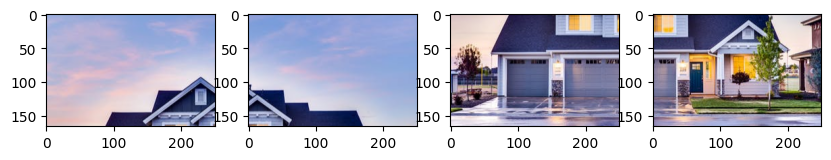

In [113]:
visualize(img_list)

In [154]:
def random_img_list(img_list):
    for i in range(len(img_list)):
        t_f = random.choice([0,1])
        if t_f == 1:
            img_list[i] = mirroring(img_list[i])
        
        t_f = random.choice([0,1])
        if t_f == 1:
            img_list[i] = flip(img_list[i])
        
        t_f = random.choice([0,1])
        if t_f == 1:
            img_list[i] = rotate(img_list[i])
    
    random.shuffle(img_list)

    return img_list


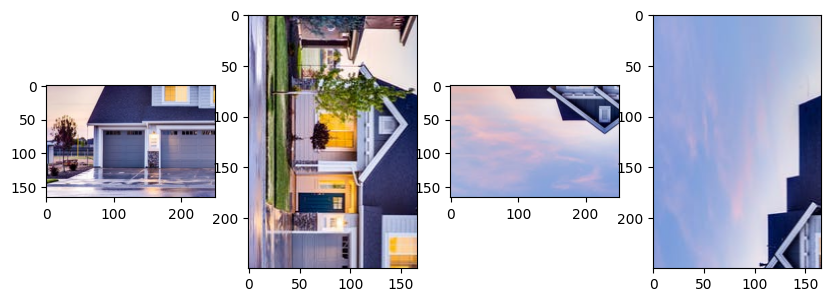

In [156]:
random_img = random_img_list(img_list)
visualize(random_img)

In [149]:
if not os.path.exists("./result"):
    os.mkdir("./result")

for i in range(n*m):
    cv2.imwrite(f"./result/{i}.jpg", cv2.cvtColor(random_img_list[i], cv2.COLOR_BGR2RGB))

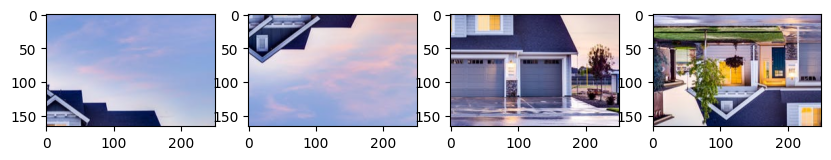

In [157]:
random_img_list = random_img_list(img_list)
visualize(random_img)